In [1]:
import numpy as np
from gwbench import network

/home/sreelakshmi/anaconda3/envs/igwn-py310/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## User Choices

#### choose the desired detectors

In [2]:

network_spec = ['aLIGO_H','aLIGO_L','aLIGO_V']

#### initialize the network with the desired detectors

In [3]:
net = network.Network(network_spec)

#### choose the desired waveform 

In [4]:
wf_model_name = 'lal_bbh_jframe'

#### pass the chosen waveform to the network for initialization

In [5]:
net.set_wf_vars(wf_model_name=wf_model_name)

#### pick the desired frequency range

In [6]:
f = np.arange(5.,1024,2**-4)
print(len(f))

16304


#### set the injection parameters

In [7]:


# inj_params = {
#     'Mc':          27.9,
#     'eta':         0.249,
#     'a_1':         0.34,
#     'a_2':         0.34,
#     'tilt_1':      1e-5,
#     'tilt_2':      1e-5,
#     'phi_12':      1e-5,
#     'phi_jl':      1e-5,
#     'theta_jn':    0.,
#     'DL':          200,
#     'tc':          0,
#     'phic':        0,
#     'approximant': 'IMRPhenomXPHM',
#     'ra':          np.pi/2,
#     'dec':         np.pi/4,
#     'psi':         np.pi/4,
#     'gmst0':       0
#     }

In [8]:
inj_params = {
    'Mc':          27.9,
    'eta':         0.249,
    'a_1':         0.3,
    'a_2':         0.3,
    'tilt_1':      np.pi/4,
    'tilt_2':      0,
    'phi_12':      0.,
    'phi_jl':      0.,
    'theta_jn':    0.,
    'DL':          470.,
    'tc':          0.,
    'phic':        0.,
    'approximant': 'IMRPhenomXP',
    'ra':          np.pi/2,
    'dec':         np.pi,
    'psi':         np.pi/4,
    'gmst0':       0.
}

In [9]:

from gwbench import basic_relations
tot_mass = basic_relations.M_of_Mc_eta(27.9, 0.249)
print(tot_mass)
m1,m2 = basic_relations.m1_m2_of_M_eta(tot_mass,0.249)
print(m1,m2)


64.25169587301812
34.15766496138084 30.09403091163728


In [10]:
deriv_symbs_string = 'Mc eta a_1 tilt_1 DL tc phic'

#### assign which parameters to convert to cos or log versions

In [11]:
#conv_cos = ('tilt_1')
#conv_log = ('Mc')  ##conv_cos= conv_cos, conv_log= conv_log,

#### choose whether to take Earth's rotation into account

In [12]:
use_rot = 0

#### pass all these variables to the network

In [13]:
net.set_net_vars(
    f=f, inj_params=inj_params,
    deriv_symbs_string=deriv_symbs_string,
    use_rot=use_rot
    )

## GW benchmarking

#### compute the WF polarizations

In [14]:
#net.calc_wf_polarizations()
print(net.calc_wf_polarizations())
f0=net.hfc
print(len(f0))
#print(f0)

2023-11-18 13:30:25,259 - Network - INFO : Polarizations calculated.


None
16304


#### compute the WF polarizations and their derivatives

In [15]:
net.calc_wf_polarizations_derivs_num()
#f1=net.del_hfpc
#print(len(f1))
#print(f1)

#for key in f1.keys():
   #print(key)


2023-11-18 13:30:25,292 - Network - INFO : Calculate numeric derivatives of polarizations.
2023-11-18 13:30:25,337 - Network - INFO : Polarizations calculated.
2023-11-18 13:30:30,476 - Network - INFO : Numeric derivatives of polarizations calculated.


In [16]:
f1=net.del_hfpc
print(len(f1))
print(f1)

for key in f1.keys():
   print(key)

14
{'del_Mc_hfp': array([-8.21811976e-24-8.21799496e-24j, -2.98212289e-22-1.23087883e-22j,
       -3.00293979e-22-5.48491100e-22j, ...,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j]), 'del_Mc_hfc': array([-8.21805736e-24+8.21805736e-24j, -1.23087938e-22+2.98212242e-22j,
       -5.48491219e-22+3.00294102e-22j, ...,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j]), 'del_eta_hfp': array([-6.49157858e-23-6.49157858e-23j,  1.32663038e-21+3.95809130e-22j,
        1.41746993e-21+2.29847604e-21j, ...,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j]), 'del_eta_hfc': array([-6.49314622e-23+6.49314622e-23j,  3.95803679e-22-1.32660854e-21j,
        2.29849140e-21-1.41745218e-21j, ...,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j]), 'del_a

#### setup antenna patterns, location phase factors, and PSDs

In [17]:
net.setup_ant_pat_lpf_psds()

2023-11-18 13:30:30,578 - Network - INFO : PSDs loaded.
2023-11-18 13:30:30,583 - Network - INFO : Antenna patterns and LPFs loaded.


#### compute the detector responses

In [18]:
net.calc_det_responses()

2023-11-18 13:30:30,706 - Network - INFO : Detector responses calculated.


#### 
compute the detector responses and their derivatives

In [19]:
net.calc_det_responses_derivs_num()


2023-11-18 13:30:30,719 - Network - INFO : Calculate numeric derivatives of detector responses.
2023-11-18 13:30:30,722 - Network - INFO :    aLIGO_H
2023-11-18 13:30:33,433 - Network - INFO :    aLIGO_L
2023-11-18 13:30:36,054 - Network - INFO :    aLIGO_V
2023-11-18 13:30:38,621 - Network - INFO : Numeric derivatives of detector responses calculated.


In [20]:

h=net.detectors[0].del_hf
print(h)

{'del_Mc_hf': array([-2.44403812e-24+2.37936402e-24j, -1.57919772e-23-1.20002979e-25j,
        1.27355268e-23-2.78097653e-23j, ...,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j]), 'del_eta_hf': array([-3.32281072e-23+3.23581577e-23j,  1.38532749e-22-7.65817909e-23j,
       -5.01168656e-23+2.98481731e-22j, ...,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j]), 'del_a_1_hf': array([-5.70079921e-25+5.54509055e-25j,  1.43261198e-23-3.84534282e-24j,
       -8.42743606e-24+2.80303884e-23j, ...,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j]), 'del_tilt_1_hf': array([ 5.04355623e-25-4.91185214e-25j, -4.07463912e-24+1.57990490e-24j,
        2.00911793e-24-8.30764041e-24j, ...,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j]), 'del_DL_h

#### 
calculate the network and detector SNRs

In [21]:
net.calc_snrs()
print(net.detectors[0].snr)
print(net.detectors[1].snr)
print(net.detectors[2].snr)
net_opt_snr = np.linalg.norm([net.detectors[0].snr, net.detectors[1].snr, net.detectors[2].snr])
print(net_opt_snr)

2023-11-18 13:30:38,718 - Network - INFO : SNRs calculated.


61.20084905380184
78.13769293605522
42.03230839797274
107.78570374376085


#### 
calculate the network and detector Fisher matrices, condition numbers, covariance matrices, error estimates, and inversion errors

In [22]:
net.calc_errors()

2023-11-18 13:30:38,763 - Network - INFO : Calculate errors (Fisher & cov matrices).
2023-11-18 13:30:38,765 - Network - INFO :    aLIGO_H
2023-11-18 13:30:38,934 - Network - INFO :    aLIGO_L
2023-11-18 13:30:38,997 - Network - INFO :    aLIGO_V
2023-11-18 13:30:39,076 - Network - INFO : Errors calculated.


#### calculate the 90%-credible sky area (in deg)

In [23]:
net.calc_sky_area_90()

2023-11-18 13:30:39,084 - Network - WARNING : calc_sky_area_90: tag = network - Nothing done due to missing of either RA or COS_DEC (DEC) errors.


In [24]:
h_ul=net.detectors[0].hf
print(len(h_ul))
A_ul=np.abs(h_ul)
phi_ul= np.angle(h_ul)
print(A_ul[:100])

16224
[1.18371202e-22 1.17490438e-22 1.16621487e-22 1.15764118e-22
 1.14918105e-22 1.14083232e-22 1.13259285e-22 1.12446061e-22
 1.11643358e-22 1.10850981e-22 1.10068739e-22 1.09296444e-22
 1.08533912e-22 1.07780965e-22 1.07037424e-22 1.06303119e-22
 1.05577880e-22 1.04861544e-22 1.04153952e-22 1.03454947e-22
 1.02764380e-22 1.02082102e-22 1.01407971e-22 1.00741846e-22
 1.00083591e-22 9.94330727e-23 9.87901589e-23 9.81547214e-23
 9.75266342e-23 9.69057736e-23 9.62920183e-23 9.56852495e-23
 9.50853508e-23 9.44922084e-23 9.39057111e-23 9.33257502e-23
 9.27522196e-23 9.21850157e-23 9.16240375e-23 9.10691862e-23
 9.05203652e-23 8.99774802e-23 8.94404386e-23 8.89091501e-23
 8.83835258e-23 8.78634786e-23 8.73489230e-23 8.68397751e-23
 8.63359524e-23 8.58373739e-23 8.53439601e-23 8.48556330e-23
 8.43723160e-23 8.38939340e-23 8.34204135e-23 8.29516822e-23
 8.24876697e-23 8.20283066e-23 8.15735252e-23 8.11232593e-23
 8.06774437e-23 8.02360149e-23 7.97989105e-23 7.93660694e-23
 7.89374315e-23 7.

In [25]:
f2=net.detectors[0].del_hf
print(len(f2))
#print(f2)
key_list = list(f2.keys()) # returns a list containing the derivatives for each parameter.
print(key_list)
#for i in range(len(key_list)):
#print(f2[key_list[0]])
print(len(f2[key_list[4]]))
a=f2[key_list[1]]
print(a[:10])

7
['del_Mc_hf', 'del_eta_hf', 'del_a_1_hf', 'del_tilt_1_hf', 'del_DL_hf', 'del_tc_hf', 'del_phic_hf']
16224
[-3.32281072e-23+3.23581577e-23j  1.38532749e-22-7.65817909e-23j
 -5.01168656e-23+2.98481731e-22j -3.38384120e-22-2.90174570e-22j
  5.44595112e-22-2.16394950e-22j -4.49153237e-23+7.21773552e-22j
 -7.66236750e-22-3.84273791e-22j  7.30995172e-22-6.64850258e-22j
  4.37870274e-22+1.02653370e-21j -1.23473173e-21+1.23987877e-22j]


In [26]:
f3=net.detectors[0].fisher
print(f3)

[[ 4.92658850e+05 -9.67347670e+06 -8.87604717e+05  2.53929795e+05
  -2.25292205e-01 -2.40339956e+07  4.25956142e+04]
 [-9.67347670e+06  1.92458018e+08  1.76394162e+07 -5.04068472e+06
  -1.68010155e+01  5.03030164e+08 -8.27627422e+05]
 [-8.87604717e+05  1.76394162e+07  1.61726430e+06 -4.62194945e+05
  -6.45852250e-01  4.59343002e+07 -7.59961662e+04]
 [ 2.53929795e+05 -5.04068472e+06 -4.62194945e+05  1.32110103e+05
   2.46468237e-01 -1.30341322e+07  2.17553997e+04]
 [-2.25292205e-01 -1.68010155e+01 -6.45852250e-01  2.46468237e-01
   1.69551087e-02 -1.90823956e-02 -8.17157184e-07]
 [-2.40339956e+07  5.03030164e+08  4.59343002e+07 -1.30341322e+07
  -1.90823956e-02  1.74330590e+09 -2.00030290e+06]
 [ 4.25956142e+04 -8.27627422e+05 -7.59961662e+04  2.17553997e+04
  -8.17157184e-07 -2.00030290e+06  3.74554492e+03]]


In [27]:
u,v = np.linalg.eig(f3)
print(u)


[1.89390575e+09 4.41005086e+07 2.99363463e+03 4.11764461e+02
 2.55766045e+01 3.17745196e-01 3.48236856e-03]


In [28]:
cov_matrix =net.detectors[0].cov
print(cov_matrix)

[[ 2.28481786e-03  6.61555314e-05 -1.95925217e-02 -6.81205094e-02
   3.39844406e-01  1.07489523e-05 -7.48556154e-03]
 [ 6.61555314e-05  2.95387745e-05 -3.34274326e-03 -1.04833255e-02
   5.52111752e-02  1.95562097e-06 -1.13663766e-04]
 [-1.95925217e-02 -3.34274326e-03  1.09372854e+00  3.66716361e+00
  -1.52190943e+01 -7.10419379e-04 -3.86571814e-03]
 [-6.81205094e-02 -1.04833255e-02  3.66716361e+00  1.23268414e+01
  -5.07960205e+01 -2.38666544e-03 -8.99407919e-03]
 [ 3.39844406e-01  5.52111752e-02 -1.52190943e+01 -5.07960205e+01
   2.76888367e+02  9.71378759e-03 -2.28594109e-01]
 [ 1.07489523e-05  1.95562097e-06 -7.10419379e-04 -2.38666544e-03
   9.71378759e-03  4.68800408e-07  8.57693158e-06]
 [-7.48556154e-03 -1.13663766e-04 -3.86571814e-03 -8.99407919e-03
  -2.28594109e-01  8.57693158e-06  3.86665575e-02]]


In [29]:
for i in np.arange(0,7):
   err= np.sqrt(cov_matrix[i,i])
   print(err)
                


0.04779977
0.0054349587
1.0458148
3.51096
16.639963
0.00068469
0.19663814


In [30]:
from gwbench import fisher_analysis_tools
n=fisher_analysis_tools.calc_cond_number(f3)
print(n)

543855632364.38666


In [31]:
n = 7
prior_matrix = np.zeros((n, n), dtype=float)
#prior_matrix[2,2] = 8.650
#prior_matrix[3,3] = 1/(np.pi/4)**2
prior_matrix[6,6] = 1/(np.pi**2)
#print(prior_matrix)
prior_fisher = f3 + prior_matrix
print(prior_fisher)

[[ 4.92658850e+05 -9.67347670e+06 -8.87604717e+05  2.53929795e+05
  -2.25292205e-01 -2.40339956e+07  4.25956142e+04]
 [-9.67347670e+06  1.92458018e+08  1.76394162e+07 -5.04068472e+06
  -1.68010155e+01  5.03030164e+08 -8.27627422e+05]
 [-8.87604717e+05  1.76394162e+07  1.61726430e+06 -4.62194945e+05
  -6.45852250e-01  4.59343002e+07 -7.59961662e+04]
 [ 2.53929795e+05 -5.04068472e+06 -4.62194945e+05  1.32110103e+05
   2.46468237e-01 -1.30341322e+07  2.17553997e+04]
 [-2.25292205e-01 -1.68010155e+01 -6.45852250e-01  2.46468237e-01
   1.69551087e-02 -1.90823956e-02 -8.17157184e-07]
 [-2.40339956e+07  5.03030164e+08  4.59343002e+07 -1.30341322e+07
  -1.90823956e-02  1.74330590e+09 -2.00030290e+06]
 [ 4.25956142e+04 -8.27627422e+05 -7.59961662e+04  2.17553997e+04
  -8.17157184e-07 -2.00030290e+06  3.74564624e+03]]


In [32]:
def invertSVD(matrix):
    '''
    Adapted from GWFish
    '''
    thresh = 1e-10

    dm = np.sqrt(np.diag(matrix))
    normalizer = np.outer(dm, dm)
    matrix_norm = matrix / normalizer

    [U, S, Vh] = np.linalg.svd(matrix_norm)

    kVal = sum(S > thresh)
    matrix_inverse_norm = U[:, 0:kVal] @ np.diag(1. / S[0:kVal]) @ Vh[0:kVal, :]

    # print(matrix @ (matrix_inverse_norm / normalizer))

    return matrix_inverse_norm / normalizer, S

In [33]:
new_cov = invertSVD(prior_fisher)
print(new_cov[0])

[[ 2.27916271e-03  6.60696610e-05 -1.95954426e-02 -6.81273078e-02
   3.39671719e-01  1.07554322e-05 -7.45634939e-03]
 [ 6.60696610e-05  2.95374707e-05 -3.34278754e-03 -1.04834286e-02
   5.52085539e-02  1.95571930e-06 -1.13220195e-04]
 [-1.95954426e-02 -3.34278754e-03  1.09372704e+00  3.66716017e+00
  -1.52191838e+01 -7.10416006e-04 -3.85063247e-03]
 [-6.81273078e-02 -1.04834286e-02  3.66716017e+00  1.23268332e+01
  -5.07962273e+01 -2.38665774e-03 -8.95898032e-03]
 [ 3.39671719e-01  5.52085539e-02 -1.52191838e+01 -5.07962273e+01
   2.76883086e+02  9.71398588e-03 -2.27702032e-01]
 [ 1.07554322e-05  1.95571930e-06 -7.10416006e-04 -2.38665774e-03
   9.71398588e-03  4.68792970e-07  8.54346031e-06]
 [-7.45634939e-03 -1.13220195e-04 -3.85063247e-03 -8.95898032e-03
  -2.27702032e-01  8.54346031e-06  3.85156620e-02]]


In [34]:
for i in np.arange(0,7):
   err= np.sqrt(new_cov[0][i,i])
   print(err)

0.047740577153940464
0.0054348386047538225
1.0458140579123543
3.510959016561785
16.639804272758344
0.0006846845770179025
0.19625407507400913


#### calculation of systematic errors

In [35]:
from gwbench.wf_models import py_lgw
lgw = py_lgw.lensed_wf_gen()
x = (1e1, 5e1, 1e2, 5e2, 1e3, 5e3, 1e4, 5e4, 1e5)
y = (0.01, 0.05, 0.1, 0.5, 1.0, 3.0, 5.0)
chirp_time = lgw.tchirp_2PN(64.25, 0.249, f_low=10) # returns the chirptime given the total mass,eta and low frequency cut off.
#print(chirp_time)
ml_y_pairs = []
for i in x:
    for j in y:
        time_delay= lgw.td_point_sec(i, j, zl=0)
        if time_delay < chirp_time:
            pairs = (i,j)
            ml_y_pairs.append(pairs)

print(len(ml_y_pairs))  

59


In [36]:
delta_h_list=[]
for i,j in  ml_y_pairs:
        fs = net.detectors[0].f # returns the truncated frequency array tto the range dictated by the given detector’s PSD
        ws = lgw.w_of_f(fs, ml=i) #Converts a dimensionful frequency (f) to the dimensionless frequency (w)
        Fws = lgw.point_Fw_eff_map(ws,j) # returns an array containing amplification factors
    
        #calculation of  amplitude differences and (A_l-A_ul) and Phase differences using the analytical formula.
        R = np.abs(Fws)
        phi = np.angle(Fws)
        delta_A = A_ul*(R-1)
        delta_phi = phi

        # calculation of deta_h (h_l-h_ul) (reference - Eq.30 arXiv:0707.2982)
        delta_h = (delta_A + 1j*A_ul*delta_phi)*np.exp(1j*phi_ul)
        delta_h_list.append(delta_h)

print(len(delta_h_list))

59


In [37]:
import gwbench.snr as snr_mod
inner_product_list=[]
for j in range(len(delta_h_list)):
    for i in range(len(key_list)):
         inner_product = snr_mod.scalar_product_freq_array(delta_h_list[j], f2[key_list[i]], net.detectors[0].psd, fs)
         inner_product_list.append(inner_product)
print(len(inner_product_list))

413


In [38]:
inner_list_length = 7
sep_inner_product = [inner_product_list[i:i + inner_list_length] for i in range(0, len(inner_product_list), inner_list_length)]
print(len(sep_inner_product))
print(sep_inner_product[58])
#print(sep_inner_product[1])


59
[12.905302729505847, 962.4088200748167, 36.98991240549073, -14.117574835305163, -0.9716082077696225, -0.675586331965182, 0.011417835766350894]


In [39]:
delta_p_list=[]

for i in range (len(sep_inner_product)):
    error =0
    for j in range (0,7):
      
           error += new_cov[0][1,j]* sep_inner_product[i][j]
    delta_p_list.append(error)

print(len(delta_p_list))
abs_err= np.abs(delta_p_list)/0.249
print(abs_err)

59
[2.66708078e-02 2.66630756e-02 2.66389072e-02 2.58612671e-02
 2.33803590e-02 4.41679995e-03 3.39656576e-03 1.15346597e-01
 1.14986851e-01 1.13864176e-01 7.90534506e-02 2.50820910e-02
 5.16376164e-03 3.04130812e-03 1.81217956e-01 1.79191560e-01
 1.72907068e-01 1.80299363e-03 1.39207326e-02 1.30474543e-02
 3.09190715e-03 4.47244968e-01 3.40051649e-01 7.10633898e-02
 9.18574096e-03 3.22798547e-02 2.29744119e-03 3.15235658e-04
 6.15038069e-01 1.06040394e-01 1.12305968e-01 5.75115550e-02
 2.35359962e-02 1.50938390e-04 1.84527575e-04 2.39193365e-01
 1.33886775e-01 8.39850513e-02 6.49593080e-03 2.04388523e-04
 1.51413616e-04 6.72054424e-06 7.31992910e-01 8.38859505e-02
 6.55824685e-02 2.17006127e-03 3.97635990e-04 8.06180597e-05
 2.10850555e-06 6.66648603e-02 1.64828023e-02 5.28236959e-03
 4.44546270e-04 1.13448190e-04 1.30630058e-01 7.00146356e-03
 2.80225708e-03 3.89861394e-04 5.12319012e-05]


In [40]:
samples= np.column_stack(ml_y_pairs).T
masses =np.array(samples[:,0])
y= np.array(samples[:, 1])
err=np.array(abs_err)
indices = np.where(abs_err>0.4)
ml_check = masses[indices]
y_check = y[indices]
err_check = err[indices]
print(len(ml_check))
print(ml_check)
print(y_check)
print(err_check)

3
[  500.  1000. 10000.]
[0.01 0.01 0.01]
[0.44724497 0.61503807 0.73199291]


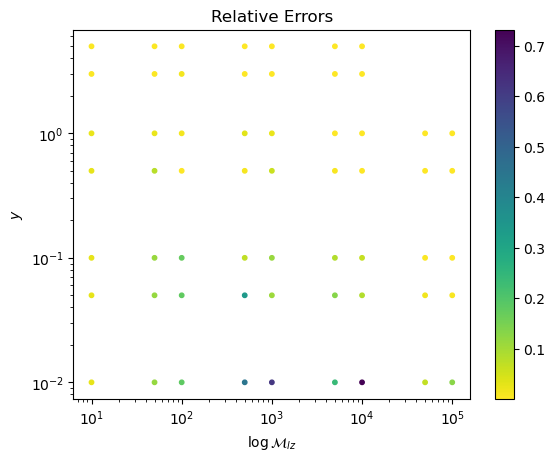

In [41]:
import matplotlib.pyplot as plt

map = plt.cm.get_cmap('viridis')
reversed_map= map.reversed(map) 
plot = plt.scatter(samples[:, 0], samples[:, 1], c=abs_err, cmap=reversed_map,  s=10)
plt.xlabel(r'$\log \mathcal{M}_{lz}$')
plt.ylabel(r'$y$')
plt.xscale('log')
plt.yscale('log')
# ticks_list = []
cbar = plt.colorbar(plot)
# cbar.set_ticklabels(list(map(str, ticks_list)))
plt.title('Relative Errors')
plt.savefig('Abs_Errors in eta.png',dpi=300, bbox_inches='tight')
plt.show()

In [42]:
fs = net.detectors[2].f # returns the truncated frequency array tto the range dictated by the given detector’s PSD
ws = lgw.w_of_f(fs, ml=10000) #Converts a dimensionful frequency (f) to the dimensionless frequency (w)
Fws = lgw.point_Fw_eff_map(ws,0.01)
h_l = h_ul*Fws
#print(len(h_l))
snr_ul=snr_mod.snr_freq_array(h_ul,net.detectors[2].psd,fs)
snr_l =snr_mod.snr_freq_array(h_l,net.detectors[2].psd,fs)
print(snr_l/snr_ul)

11.188506314497964


### Systematic error propogation for spin parameters

In [43]:
delta_eta_list=[]

for i in range (len(sep_inner_product)):
    error =0
    for j in range (0,7):
      
           error += new_cov[0][1,j]* sep_inner_product[i][j]
    delta_eta_list.append(error)

print(len(delta_eta_list))
eta_err=np.abs(delta_eta_list)
#print(eta_err)
print(max(eta_err))

59
0.18226623448546128


In [44]:
delta_chi1_list=[]

for i in range (len(sep_inner_product)):
    error =0
    for j in range (0,7):
      
           error += new_cov[0][2,j]* sep_inner_product[i][j]
    delta_chi1_list.append(error)

print(len(delta_chi1_list))
chi1_err=np.abs(delta_chi1_list)
print(max(chi1_err))


59
38.67554526363741


In [45]:
delta_tilt1_list=[]

for i in range (len(sep_inner_product)):
    error =0
    for j in range (0,7):
      
           error += new_cov[0][3,j]* sep_inner_product[i][j]
    delta_tilt1_list.append(error)

print(len(delta_tilt1_list))
tilt1_err=np.abs(delta_tilt1_list)
print(max(tilt1_err))

59
132.1664822115678


In [46]:
# delta_chi2_list=[]

# for i in range (len(sep_inner_product)):
#     error =0
#     for j in range (0,9):
      
#            error += cov_matrix[4,j]* sep_inner_product[i][j]
#     delta_chi2_list.append(error)

# print(len(delta_chi2_list))
# chi2_err=np.abs(delta_chi2_list)
# print(chi2_err)


In [47]:
# delta_tilt2_list=[]

# for i in range (len(sep_inner_product)):
#     error =0
#     for j in range (0,9):
      
#            error += cov_matrix[5,j]* sep_inner_product[i][j]
#     delta_tilt2_list.append(error)

# print(len(delta_tilt2_list))
# tilt2_err=np.abs(delta_tilt2_list)
# print(max(tilt2_err))

In [48]:
eta = 0.249
chi_1 = 0.3
chi_2 = 0.3
tilt_1 = np.pi/4
tilt_2 = 0


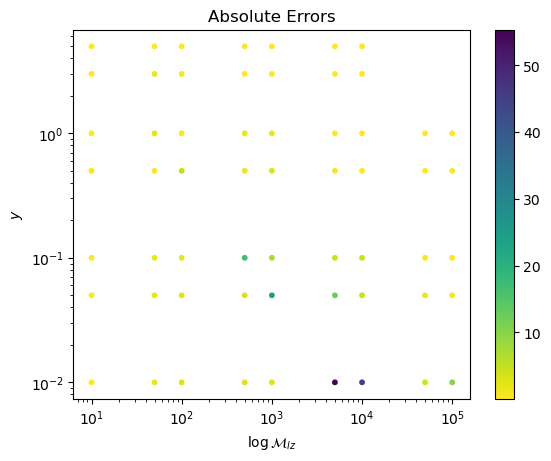

In [49]:
chip_err =chi1_err* np.sin(tilt_1)+ chi_1*np.cos(tilt_1)*tilt1_err
#print(chip_err)
import matplotlib.pyplot as plt

map = plt.cm.get_cmap('viridis')
reversed_map= map.reversed(map) 
plot = plt.scatter(samples[:, 0], samples[:, 1], c=chip_err, cmap=reversed_map,  s=10)
plt.xlabel(r'$\log \mathcal{M}_{lz}$')
plt.ylabel(r'$y$')
plt.xscale('log')
plt.yscale('log')
# ticks_list = []
cbar = plt.colorbar(plot)
# cbar.set_ticklabels(list(map(str, ticks_list)))
plt.title('Absolute Errors')
plt.savefig('Abs_Errors in chip.png',dpi=300, bbox_inches='tight')
plt.show()

In [50]:
chi_eff_err =np.abs(1/2 * (1+np.sqrt(1-4*eta))*np.cos(tilt_1)*chi1_err+1/(np.sqrt(1-4*eta))*(chi_2*np.cos(tilt_2)-chi_1*np.cos(tilt_1))*eta_err- 1/2 * (1+np.sqrt(1-4*eta))*np.sin(tilt_1)*chi_1*tilt1_err)#+1/2*(1-np.sqrt(1-4*eta))*np.cos(tilt_2)*chi2_err- 1/2 * (1-np.sqrt(1-4*eta))*np.sin(tilt_2)*chi_2*tilt2_err
print(len(chi_eff_err))

59


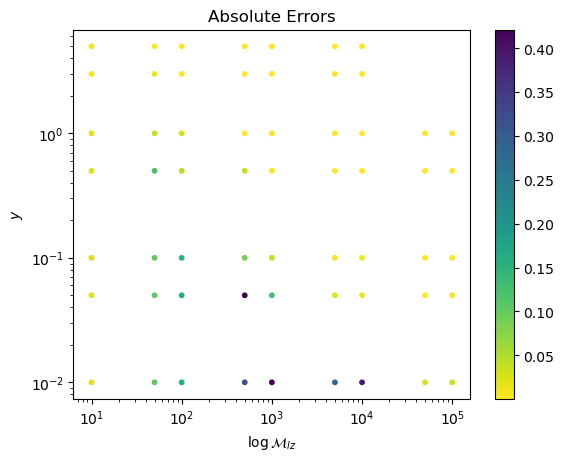

In [51]:
import matplotlib.pyplot as plt

map = plt.cm.get_cmap('viridis')
reversed_map= map.reversed(map) 
plot = plt.scatter(samples[:, 0], samples[:, 1], c=chi_eff_err, cmap=reversed_map,  s=10)
plt.xlabel(r'$\log \mathcal{M}_{lz}$')
plt.ylabel(r'$y$')
plt.xscale('log')
plt.yscale('log')
# ticks_list = []
cbar = plt.colorbar(plot)
# cbar.set_ticklabels(list(map(str, ticks_list)))
plt.title('Absolute Errors')
plt.savefig('Abs_Errors in chieff.png',dpi=300, bbox_inches='tight')
plt.show()

In [52]:
# eta = 0.249
# val = (np.sqrt(1-4*eta) *(1+np.sqrt(1-4*eta))**2)
# print(val)
# c=0.18229662550395137*4
# print(c)

In [53]:
# import numpy as np
# eta = 0.249
# q_err =np.abs((4 * eta_err)/(np.sqrt(1-4*eta) *(1+np.sqrt(1-4*eta))**2))
# map = plt.cm.get_cmap('viridis')
# reversed_map= map.reversed(map) 
# plot = plt.scatter(samples[:, 0], samples[:, 1], c=q_err, cmap=reversed_map,  s=10)
# plt.xlabel(r'$\log \mathcal{M}_{lz}$')
# plt.ylabel(r'$y$')
# plt.xscale('log')
# plt.yscale('log')
# # ticks_list = []
# cbar = plt.colorbar(plot)
# # cbar.set_ticklabels(list(map(str, ticks_list)))
# plt.title('Absolute Errors')
# plt.savefig('Abs_Errors in chieff.png',dpi=300, bbox_inches='tight')
# plt.show() 

In [54]:
# import numpy as np
# def my_function(x):
#     return (4* (1+np.sqrt(1-4*x)/1-np.sqrt(1-4*x))**2 + 3*(1+np.sqrt(1-4*x)/1-np.sqrt(1-4*x)))/(4+3*(1+np.sqrt(1-4*x)/1-np.sqrt(1-4*x))) 
# x_val = 0.249
# dx = 1e-6
# derivative = (my_function(x_val + 1e-6) - my_function(x_val))/dx
# print(derivative)

In [55]:
# q = m2/m1
# print(q)
# k= (4*q**2+3*q)/(4+3*q)
# print(k)
# val= (12*q**2 + 32*q+12)/(4+3*q)**2
# print(val)

In [56]:
# q = m2/m1
# chip_err1 =chi1_err* np.sin(tilt_2)+ chi_2*np.cos(tilt_2)*tilt1_err+(12*q**2 + 32*q+12)/((4+3*q)**2)*chi_2*np.sin(tilt_2)*q_err
# #print(chip_err)
# import matplotlib.pyplot as plt

# map = plt.cm.get_cmap('viridis')
# reversed_map= map.reversed(map) 
# plot = plt.scatter(samples[:, 0], samples[:, 1], c=chip_err1, cmap=reversed_map,  s=10)
# plt.xlabel(r'$\log \mathcal{M}_{lz}$')
# plt.ylabel(r'$y$')
# plt.xscale('log')
# plt.yscale('log')
# # ticks_list = []
# cbar = plt.colorbar(plot)
# # cbar.set_ticklabels(list(map(str, ticks_list)))
# plt.title('Absolute Errors')
# plt.savefig('Abs_Errors in chip.png',dpi=300, bbox_inches='tight')
# plt.show()

In [57]:
# chi_eff_err1 = np.abs(1/(np.sqrt(1-4*eta))*(chi_2*np.cos(tilt_2)-chi_1*np.cos(tilt_1))*eta_err +1/2 * (1+np.sqrt(1-4*eta))*np.cos(tilt_2)*chi1_err-1/2 * (1+np.sqrt(1-4*eta))*np.sin(tilt_2)*chi_2*tilt1_err)

In [58]:
# import matplotlib.pyplot as plt

# map = plt.cm.get_cmap('viridis')
# reversed_map= map.reversed(map) 
# plot = plt.scatter(samples[:, 0], samples[:, 1], c=chi_eff_err1, cmap=reversed_map,  s=10)
# plt.xlabel(r'$\log \mathcal{M}_{lz}$')
# plt.ylabel(r'$y$')
# plt.xscale('log')
# plt.yscale('log')
# # ticks_list = []
# cbar = plt.colorbar(plot)
# # cbar.set_ticklabels(list(map(str, ticks_list)))
# plt.title('Absolute Errors')
# plt.savefig('Abs_Errors in chieff.png',dpi=300, bbox_inches='tight')
# plt.show()